In [1]:
import random
plantwidth = []
plantheight= []
phvalue=[]
temp=[]
humid=[]#in percentange
moist=[]#in percentange
growth=[]#growth
for i in range(1,10001):
    n = random.randint(14,40)
    m = random.randint(15,120)
    l=random.randint(3,10)
    j=random.randint(17,40)
    k=random.randint(40,110)
    z=random.randint(10,45)
    plantwidth.append(n)
    plantheight.append(m)
    phvalue.append(l)
    temp.append(j)
    humid.append(k)
    moist.append(z)

In [2]:
import pandas as pd
df = pd.DataFrame(list(zip(plantheight, plantwidth,phvalue,temp,humid,moist)),columns =['plantheight','plantwidth','phvalue','temp','humid','moist'])


In [3]:
df

,plantheight,plantwidth,phvalue,temp,humid,moist
0,105,40,4,28,96,39
1,94,15,8,39,59,24
2,117,25,5,28,44,10
3,50,38,6,39,51,44
4,19,20,6,21,73,37
...,...,...,...,...,...,...
9995,86,19,5,20,89,44
9996,77,30,6,18,98,19
9997,97,37,4,21,85,21
9998,63,23,8,25,88,11


In [4]:
t=df['temp'].to_list()

In [5]:
light=[]
for i in t:
    ans=i*289
    light.append(ans)

In [6]:
df1=pd.DataFrame(light,columns=['light'])

In [7]:
df['growth'] = df['plantheight']/df['plantwidth']

In [8]:
df

,plantheight,plantwidth,phvalue,temp,humid,moist,growth
0,105,40,4,28,96,39,2.625000
1,94,15,8,39,59,24,6.266667
2,117,25,5,28,44,10,4.680000
3,50,38,6,39,51,44,1.315789
4,19,20,6,21,73,37,0.950000
...,...,...,...,...,...,...,...
9995,86,19,5,20,89,44,4.526316
9996,77,30,6,18,98,19,2.566667
9997,97,37,4,21,85,21,2.621622
9998,63,23,8,25,88,11,2.739130


In [9]:
df.loc[df['growth'] >2, 'possible'] = '1'
df.loc[df['growth'] <=2, 'possible'] = '0'

In [10]:
df

,plantheight,plantwidth,phvalue,temp,humid,moist,growth,possible
0,105,40,4,28,96,39,2.625000,1
1,94,15,8,39,59,24,6.266667,1
2,117,25,5,28,44,10,4.680000,1
3,50,38,6,39,51,44,1.315789,0
4,19,20,6,21,73,37,0.950000,0
...,...,...,...,...,...,...,...,...
9995,86,19,5,20,89,44,4.526316,1
9996,77,30,6,18,98,19,2.566667,1
9997,97,37,4,21,85,21,2.621622,1
9998,63,23,8,25,88,11,2.739130,1


In [11]:
df['possible'].value_counts()

1    6237
0    3763
Name: possible, dtype: int64

In [12]:
frames=[df,df1]
dff=pd.concat(frames,axis=1)

In [13]:
dff.to_csv('data.csv')

In [14]:
dff_new=pd.read_csv("data.csv")

In [15]:
dff_new

,Unnamed: 0,plantheight,plantwidth,phvalue,temp,humid,moist,growth,possible,light
0,0,105,40,4,28,96,39,2.625000,1,8092
1,1,94,15,8,39,59,24,6.266667,1,11271
2,2,117,25,5,28,44,10,4.680000,1,8092
3,3,50,38,6,39,51,44,1.315789,0,11271
4,4,19,20,6,21,73,37,0.950000,0,6069
...,...,...,...,...,...,...,...,...,...,...
9995,9995,86,19,5,20,89,44,4.526316,1,5780
9996,9996,77,30,6,18,98,19,2.566667,1,5202
9997,9997,97,37,4,21,85,21,2.621622,1,6069
9998,9998,63,23,8,25,88,11,2.739130,1,7225


In [16]:
x=dff_new.drop(['possible','plantheight','plantwidth','phvalue','Unnamed: 0'],axis=1)
y=dff_new['possible']

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

In [18]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.5)

In [19]:
x_train

,temp,humid,moist,growth,light
872,20,47,10,3.840000,5780
7466,32,107,44,1.656250,9248
3495,23,84,24,2.771429,6647
9454,38,64,27,1.948718,10982
504,20,109,12,2.423077,5780
...,...,...,...,...,...
2229,22,110,34,3.000000,6358
7761,19,61,19,1.705882,5491
5067,27,53,18,2.969697,7803
5506,25,43,33,2.842105,7225


In [20]:
y_train

872     1
7466    0
3495    1
9454    0
504     1
       ..
2229    1
7761    0
5067    1
5506    1
6442    1
Name: possible, Length: 5000, dtype: int64

In [19]:
y_test

3847    0
2236    1
1689    1
5331    1
9608    1
       ..
9243    0
6301    0
3044    1
6194    1
3123    1
Name: possible, Length: 5000, dtype: object

In [21]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

Y_pred_lr = lr.predict(x_test)


C:\Users\Aman avi\.conda\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 99.9 %


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Logistic_Regression'}>

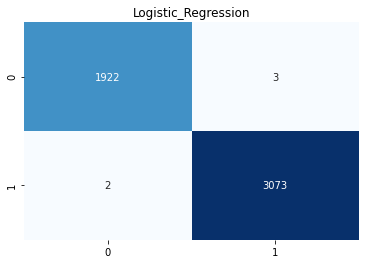

In [25]:
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [26]:
import pickle
with open('Logistic_regression.sav','wb') as f:
    pickle.dump(lr,f)

# SVM Linear

In [27]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 99.3 %


<AxesSubplot:title={'center':'SVM'}>

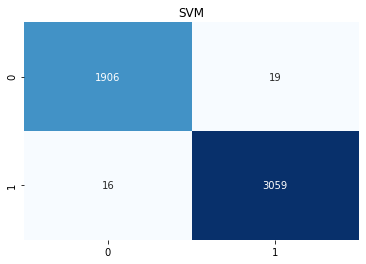

In [28]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [29]:
import pickle
with open('SVM.sav','wb') as f:
    pickle.dump(sv,f)

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)
nb.score(x_test,y_test)
Y_pred_nb = nb.predict(x_test)

In [31]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 99.16 %


<AxesSubplot:title={'center':'Naive Bayes'}>

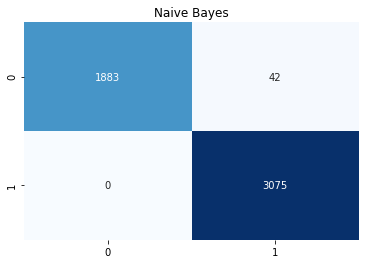

In [32]:
lr_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("Naive Bayes")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [33]:
import pickle
with open('nb.sav','wb') as f:
    pickle.dump(nb,f)

# Decision Tree

In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


<AxesSubplot:title={'center':'Decision Tree'}>

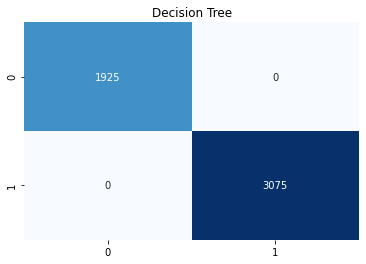

In [35]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [36]:
import pickle
with open('dt.sav','wb') as f:
    pickle.dump(dt,f)

# Random Forest

In [37]:
rfc=RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [38]:
score_rf

100.0

<AxesSubplot:title={'center':'Random Forest'}>

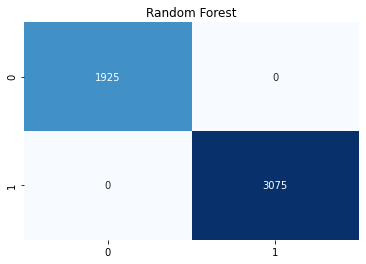

In [39]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [40]:
import pickle
with open('rf.sav','wb') as f:
    pickle.dump(rfc,f)

 # Adaptive Boost Classifier

In [41]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
ada.fit(x_train, y_train)
ada.score(x_test,y_test)
predictions = ada.predict(x_test)


In [42]:
score_ada = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_ada)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


<AxesSubplot:title={'center':'ADA Boost'}>

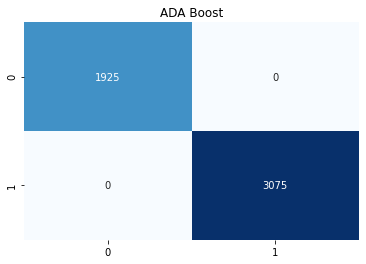

In [43]:
lr_cm=confusion_matrix(y_test,predictions)
plt.title("ADA Boost")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [64]:
import pickle
with open('ada.sav','wb') as f:
    pickle.dump(ada,f)

In [44]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=(5,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
157/157 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8622
Epoch 2/50
157/157 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8796
Epoch 3/50
157/157 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8842
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8896
Epoch 5/50
157/157 [==============================] - 0s 3ms/step - loss: 0.8154 - accuracy: 0.8056
Epoch 6/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8908
Epoch 7/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9012
Epoch 8/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9028
Epoch 9/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8862
Epoch 10/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9042

In [51]:
model.evaluate(x_test,y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8702


[0.3436492085456848, 0.870199978351593]

In [58]:
model.save('ann_new.hp5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ann_new.hp5\assets


In [52]:
pred=model.predict(x_test)

In [53]:
pred

array([[9.9999964e-01],
       [5.3813170e-07],
       [7.9469681e-03],
       ...,
       [3.1552017e-03],
       [9.9965352e-01],
       [9.8921716e-01]], dtype=float32)

In [54]:
pred_new=[]
for m in pred:
    if m>0.6:
        pred_new.append(1)
    else:
        pred_new.append(0)

<AxesSubplot:title={'center':'ANN'}>

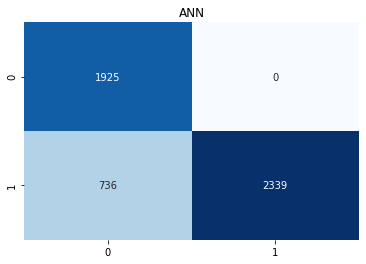

In [55]:
lr_cm=confusion_matrix(y_test,pred_new)
plt.title("ANN")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [56]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500,activation='relu')

In [57]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [59]:
pred=mlp.predict(x_test)

<AxesSubplot:title={'center':'Feed Forwarding'}>

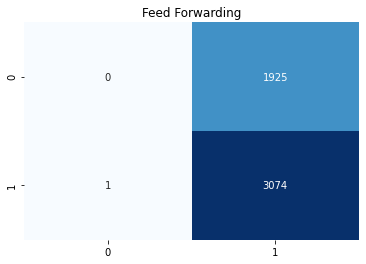

In [60]:
lr_cm=confusion_matrix(y_test,pred)
plt.title("Feed Forwarding")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [61]:
score_mlp = round(accuracy_score(pred,y_test)*100,2)

In [63]:
import pickle
with open('mlp_new.sav','wb') as f:
    pickle.dump(mlp,f)

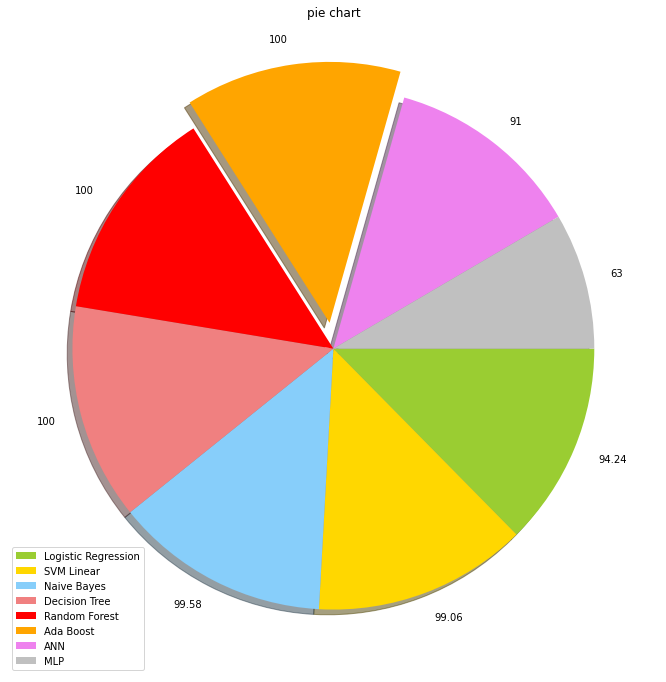

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
values = [94.24,99.06,99.58,100,100,100,91,63]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','orange','violet','silver']
labels = ['Logistic Regression','SVM Linear','Naive Bayes', 'Decision Tree', 'Random Forest','Ada Boost','ANN','MLP']
explode = (0, 0, 0, 0, 0, 0.1, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('pie chart')
plt.legend(labels,loc=3)
plt.show()
plt.savefig('piechart1.png')